# Convolve Epoch 2
## Round 1
---
### Task
- Given a random dataset and `40` features, find `20` best features.
- The selected `20` features would be tested based on `Accuracy`.
---
### Our Approach
1. Doing some `standard` tests to do `feature selection` using inbuilt tensorflow libraries.
2. Visualizing the `40` features along with the `labels` to get an idea of which feature are worth taking and are they `continuous` or `discrete`.

# Installation and Setup

In [205]:
!pip install opendatasets --upgrade --quiet

In [206]:
import opendatasets as od
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
import plotly as px

# Downloading the Dataset

In [207]:
od.download('https://www.kaggle.com/competitions/convolve2-epoch-1/data')

Skipping, found downloaded files in "./convolve2-epoch-1" (use force=True to force download)


In [208]:
os.listdir('/content/convolve2-epoch-1')

['Dataset.csv', 'sample_submission - Sheet1 (1).csv']

In [209]:
path = '/content/convolve2-epoch-1/Dataset.csv'


In [210]:
submission = '/content/convolve2-epoch-1/sample_submission - Sheet1 (1).csv'

# Our dataset

In [211]:
raw_df = pd.read_csv(path)

# Sample Submission CSV provided on kaggle.

In [212]:
submission_df = pd.read_csv(submission)
submission_df

,Variables,Mark
0,x_1,0
1,x_109,0
2,x_113,0
3,x_12,0
4,x_124,0
5,x_127,0
6,x_144,0
7,x_16,0
8,x_18,0
9,x_2,0


In [213]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4119 non-null   int64  
 1   x_1         4119 non-null   int64  
 2   x_109       4119 non-null   int64  
 3   x_113       4119 non-null   int64  
 4   x_12        4119 non-null   int64  
 5   x_124       4119 non-null   int64  
 6   x_127       4119 non-null   int64  
 7   x_144       4119 non-null   int64  
 8   x_16        4119 non-null   int64  
 9   x_18        4119 non-null   int64  
 10  x_2         4119 non-null   int64  
 11  x_25        4119 non-null   int64  
 12  x_27        4119 non-null   int64  
 13  x_28        4119 non-null   int64  
 14  x_30        4119 non-null   int64  
 15  x_33        4119 non-null   float64
 16  x_38        4119 non-null   float64
 17  x_42        4119 non-null   int64  
 18  x_44        4119 non-null   int64  
 19  x_45        4119 non-null  

# Counting number of 1's and 0's

In [214]:
raw_df['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [215]:
raw_df.describe()

,Unnamed: 0,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,...,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99,y
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,...,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,2059.000000,5166.469289,0.563244,3.048798,503.509832,50.483855,-0.122845,3.609128,34.826657,960.422190,...,-0.032340,1050.474387,16.507405,256.788055,-0.133831,248.378733,0.000371,-0.006766,-0.037985,0.109493
std,1189.197208,73.588512,0.496044,2.544466,291.454491,28.862659,1.468947,1.825079,20.441569,191.922786,...,0.289226,408.389794,9.554037,254.703736,0.572124,145.247366,0.044075,0.156240,0.380439,0.312294
min,0.000000,4964.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,1.000000,0.000000,0.000000,...,-0.620000,49.000000,0.000000,0.000000,-0.310000,0.000000,-0.180000,-0.130000,-0.660000,0.000000
25%,1029.500000,5099.000000,0.000000,1.000000,250.000000,26.000000,-2.000000,1.000000,17.000000,999.000000,...,0.110000,766.500000,8.000000,103.000000,-0.310000,122.000000,0.020000,-0.100000,-0.490000,0.000000
50%,2059.000000,5191.000000,1.000000,5.000000,497.000000,50.000000,1.000000,5.000000,35.000000,999.000000,...,0.110000,1048.000000,16.000000,181.000000,-0.310000,249.000000,0.020000,-0.100000,0.070000,0.000000
75%,3088.500000,5228.000000,1.000000,6.000000,760.500000,76.000000,1.000000,5.000000,53.000000,999.000000,...,0.110000,1332.500000,25.000000,317.000000,-0.310000,374.000000,0.020000,0.240000,0.210000,0.000000
max,4118.000000,5228.000000,1.000000,6.000000,999.000000,100.000000,1.000000,5.000000,70.000000,999.000000,...,0.110000,2077.000000,33.000000,3643.000000,2.690000,500.000000,0.020000,0.390000,0.930000,1.000000


In [216]:
columns = raw_df.columns
target = raw_df['y']

# `y` stores our `target` value which is like a label for our dataset.

In [217]:
for column in columns:
  print(column)

Unnamed: 0
x_1
x_109
x_113
x_12
x_124
x_127
x_144
x_16
x_18
x_2
x_25
x_27
x_28
x_30
x_33
x_38
x_42
x_44
x_45
x_52
x_55
x_57
x_59
x_60
x_62
x_64
x_67
x_68
x_7
x_70
x_71
x_73
x_77
x_78
x_8
x_80
x_83
x_89
x_91
x_99
y


In [218]:
name =[]
value = []

In [219]:
for column in columns:
  name.append(column)
  value.append(raw_df.y.corr(raw_df[column]))

In [220]:
corr = pd.DataFrame({
    'name':name,
    'correlation':value
})[1:].sort_values('correlation', ascending=False)

# Basic `correlation` values for the features with the labels.

## A feature with a higher absolute `correlation` value is one which affects the label values more than the others. Normal intuition tells us that these are the features that should not be ignored.

In [221]:
display = corr[1:]
display

,name,correlation
35,x_8,0.418565
36,x_80,0.327234
22,x_57,0.259786
24,x_60,0.255697
19,x_45,0.137401
40,x_99,0.127993
32,x_73,0.076423
16,x_38,0.073173
11,x_25,0.060374
13,x_28,0.049199


In [222]:
correlation_23 = list(display.head(23)['name'])

correlation_23

['x_8',
 'x_80',
 'x_57',
 'x_60',
 'x_45',
 'x_99',
 'x_73',
 'x_38',
 'x_25',
 'x_28',
 'x_91',
 'x_71',
 'x_109',
 'x_2',
 'x_89',
 'x_70',
 'x_67',
 'x_113',
 'x_55',
 'x_68',
 'x_12',
 'x_77',
 'x_7']

In [223]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Plotting the `correlation` values.

<Figure size 1000x600 with 0 Axes>

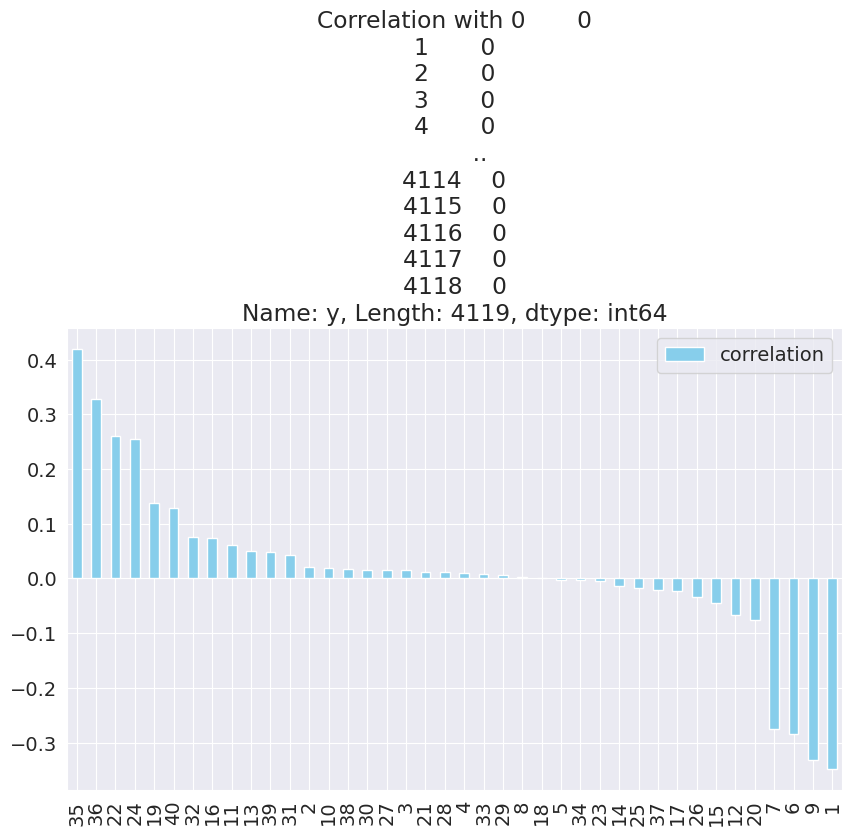

In [224]:
plt.figure(figsize=(10, 6))
display.plot(kind='bar', color='skyblue')
plt.title(f'Correlation with {target}')
# plt.xlabel('Column')
# plt.ylabel('Correlation')
plt.show()


# Plotting the `best 20 correlation` values with the name of the corresponding features.

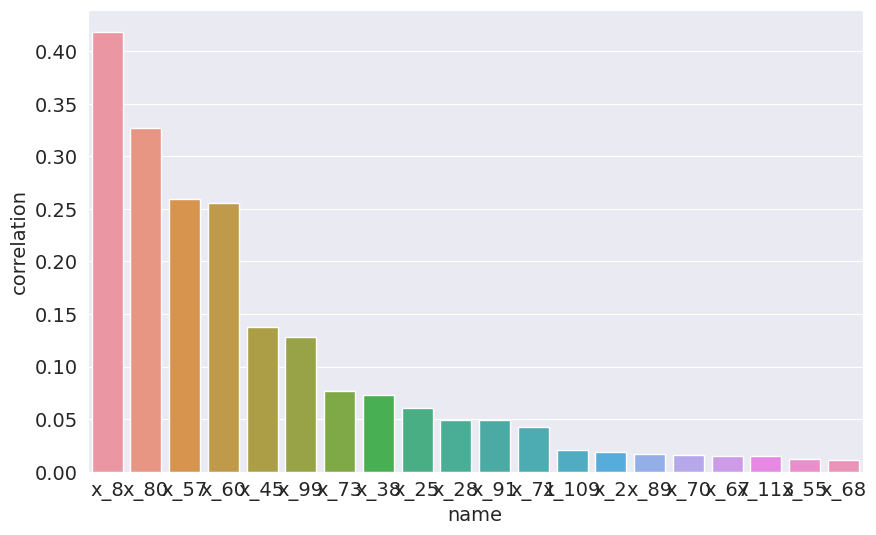

In [225]:

sns.barplot(data = display.head(20) , x = 'name' , y = 'correlation')

corr_df = display.head(20)

# Plotting the `last 10` values.

<Axes: xlabel='name', ylabel='correlation'>

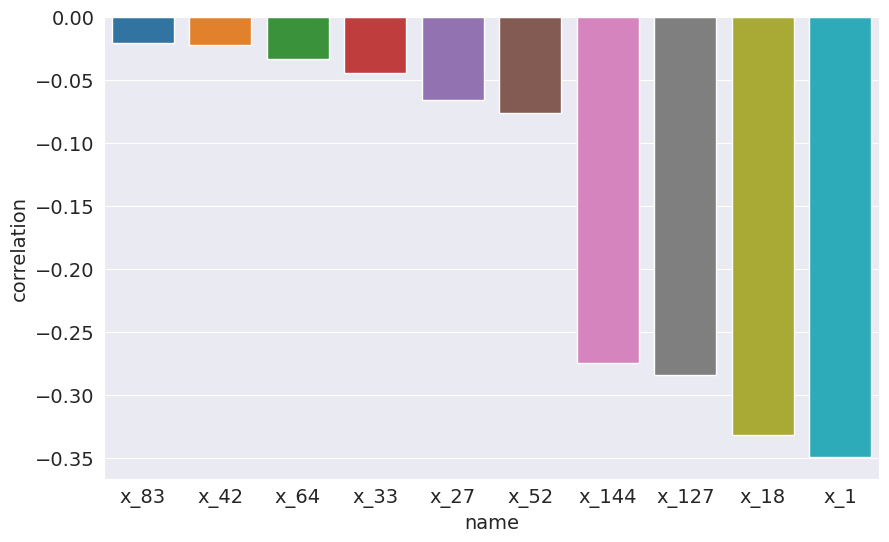

In [226]:
sns.barplot(data = display.tail(10) , x = 'name' , y = 'correlation')

# Plotting `histogram` depicting how many `0's or 1's` at range of values of a particular `feature`

In [227]:
import plotly.express as px

col = ['x_1', 'x_109', 'x_113', 'x_12', 'x_124', 'x_127',
       'x_144', 'x_16', 'x_18', 'x_2', 'x_25', 'x_27', 'x_28', 'x_30', 'x_33',
       'x_38', 'x_42', 'x_44', 'x_45', 'x_52', 'x_55', 'x_57', 'x_59', 'x_60',
       'x_62', 'x_64', 'x_67', 'x_68', 'x_7', 'x_70', 'x_71', 'x_73', 'x_77',
       'x_78', 'x_8', 'x_80', 'x_83', 'x_89', 'x_91', 'x_99']

for i in col:
    fig = px.histogram(raw_df, x=i, color='y', title=f'Impact of {i} on target')
    fig.show()


In [228]:
yes = display.correlation
yes

35    0.418565
36    0.327234
22    0.259786
24    0.255697
19    0.137401
40    0.127993
32    0.076423
16    0.073173
11    0.060374
13    0.049199
39    0.049030
31    0.042517
2     0.020343
10    0.018533
38    0.016451
30    0.016116
27    0.015368
3     0.014972
21    0.012277
28    0.011147
4     0.009255
33    0.008191
29    0.005914
8     0.001719
18    0.001467
5    -0.002862
34   -0.003405
23   -0.004367
14   -0.013542
25   -0.017317
37   -0.020492
17   -0.022616
26   -0.033204
15   -0.044597
12   -0.066218
20   -0.076091
7    -0.274686
6    -0.284577
9    -0.332012
1    -0.349099
Name: correlation, dtype: float64

# `correlation matrix` of the features among themselves.

In [229]:
data = raw_df.corr()
data

,Unnamed: 0,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,...,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99,y
Unnamed: 0,1.000000,0.003808,-0.003272,0.002807,-0.013830,-0.026231,-0.016374,-0.002162,0.027036,0.000781,...,0.024811,-0.008631,-0.013934,0.012072,-0.003560,-0.009868,0.004526,-0.006727,0.006028,0.005516
x_1,0.003808,1.000000,-0.034797,-0.023345,0.002649,0.012918,0.888620,0.918278,-0.000711,0.381679,...,-0.167558,0.000509,-0.021696,-0.044175,-0.470421,-0.010231,-0.018262,-0.088911,-0.148102,-0.349099
x_109,-0.003272,-0.034797,1.000000,-0.006390,0.026672,-0.003859,-0.035659,-0.035723,0.022707,-0.037597,...,-0.009428,0.019131,0.000401,0.017586,0.037485,-0.006740,-0.013015,0.000337,0.003249,0.020343
x_113,0.002807,-0.023345,-0.006390,1.000000,0.012660,-0.015248,-0.025813,-0.025123,0.006587,-0.013836,...,0.001323,-0.021263,-0.005933,-0.004412,0.025551,0.000722,0.006161,0.001680,0.004301,0.014972
x_12,-0.013830,0.002649,0.026672,0.012660,1.000000,0.029871,-0.001778,-0.003092,0.001997,-0.009042,...,-0.001129,0.002825,-0.002868,0.020798,0.011741,-0.003763,-0.004876,0.000774,-0.019496,0.009255
x_124,-0.026231,0.012918,-0.003859,-0.015248,0.029871,1.000000,0.007983,0.009584,-0.013323,0.002355,...,0.000336,-0.007142,-0.017570,0.009004,-0.007246,0.015564,0.014206,-0.033557,0.004858,-0.002862
x_127,-0.016374,0.888620,-0.035659,-0.025813,-0.001778,0.007983,1.000000,0.978813,-0.004979,0.266425,...,-0.182614,0.007583,-0.019955,-0.027853,-0.383305,-0.011135,-0.008222,-0.090606,-0.115912,-0.284577
x_144,-0.002162,0.918278,-0.035723,-0.025123,-0.003092,0.009584,0.978813,1.000000,-0.000554,0.273639,...,-0.174607,0.009518,-0.017952,-0.030849,-0.391444,-0.004847,-0.012806,-0.091295,-0.097415,-0.274686
x_16,0.027036,-0.000711,0.022707,0.006587,0.001997,-0.013323,-0.004979,-0.000554,1.000000,-0.015647,...,-0.011783,0.004692,-0.022917,-0.014809,0.011982,0.008808,-0.010958,-0.017737,-0.011368,0.001719
x_18,0.000781,0.381679,-0.037597,-0.013836,-0.009042,0.002355,0.266425,0.273639,-0.015647,1.000000,...,-0.089454,-0.019400,-0.002081,-0.046998,-0.900313,-0.024831,-0.005145,-0.041136,-0.112270,-0.332012


# Feature Selection Using `Mutual Information`

We are using the `mutual_info_classif` function from sklearn to select the 20 best features out of a list of 40. Here's how it works:

1. **Data Preparation**:
   - We assign the target variable `y` and the feature matrix `x` from our dataset.
   - We remove any irrelevant columns, such as the first and last columns, which are not used for feature selection.

2. **Computing Mutual Information**:
   - We calculate the Mutual Information (MI) scores between each feature in `x` and the target variable `y` using `mutual_info_classif`. MI measures the dependency between features and the target, indicating their importance for prediction.

3. **Feature Ranking**:
   - We store the MI scores in `info_gains` to identify the importance of each feature.
   - We also extract the feature names, excluding the first and last columns, to associate MI scores with feature names.

4. **Feature Selection**:
   - Finally, we select the top 20 features with the highest MI scores for future prediction tasks.

Mutual Information (MI) is a statistical measure used for feature selection. In the context of mutual_info_classif, it quantifies the dependency or information shared between each feature in the dataset and the target variable. Higher MI scores indicate stronger relationships, implying that features with the highest MI scores are the most informative for prediction. By evaluating how much information each feature provides about the target variable, mutual_info_classif helps identify and select the most relevant features, enhancing the predictive accuracy of machine learning models.


In [230]:
from sklearn.feature_selection import mutual_info_classif

In [231]:
y = target
x = raw_df
x = x.drop(raw_df.columns[[0, -1]], axis=1)
x

,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,x_2,...,x_71,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99
0,5099,1,5,156,35,-2,1,40,999,7,...,1,0.11,629,14,487,-0.31,115,0.02,-0.10,-0.49
1,5191,0,1,164,16,1,5,4,999,5,...,0,0.11,509,26,346,-0.31,317,0.02,0.24,-0.21
2,5228,1,0,774,75,1,5,12,999,4,...,0,0.11,1058,30,227,-0.31,464,0.02,-0.10,-0.21
3,5228,1,1,747,4,1,5,69,999,3,...,1,0.11,1048,4,17,-0.31,39,-0.18,-0.10,-0.21
4,5196,1,5,29,28,0,4,32,999,6,...,0,0.11,993,22,58,-0.31,492,0.02,-0.10,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,5228,1,5,197,82,1,5,6,999,4,...,1,0.11,672,23,53,-0.31,474,-0.07,-0.10,0.21
4115,5228,1,5,949,72,1,5,2,999,6,...,1,0.11,1058,6,219,-0.31,475,0.02,-0.10,0.21
4116,5099,1,1,478,41,-2,1,25,999,1,...,0,0.11,1240,16,64,0.35,210,0.02,0.24,0.93
4117,5228,1,0,554,36,1,5,68,999,0,...,0,0.11,1152,21,528,-0.31,49,0.02,-0.10,0.21


In [232]:
info_gains = mutual_info_classif(x, y)

names = raw_df.columns
names = names[1:-1]
names


Index(['x_1', 'x_109', 'x_113', 'x_12', 'x_124', 'x_127', 'x_144', 'x_16',
       'x_18', 'x_2', 'x_25', 'x_27', 'x_28', 'x_30', 'x_33', 'x_38', 'x_42',
       'x_44', 'x_45', 'x_52', 'x_55', 'x_57', 'x_59', 'x_60', 'x_62', 'x_64',
       'x_67', 'x_68', 'x_7', 'x_70', 'x_71', 'x_73', 'x_77', 'x_78', 'x_8',
       'x_80', 'x_83', 'x_89', 'x_91', 'x_99'],
      dtype='object')

# Plotting the respecitve `Mutual Info Classic` scores to get best features.

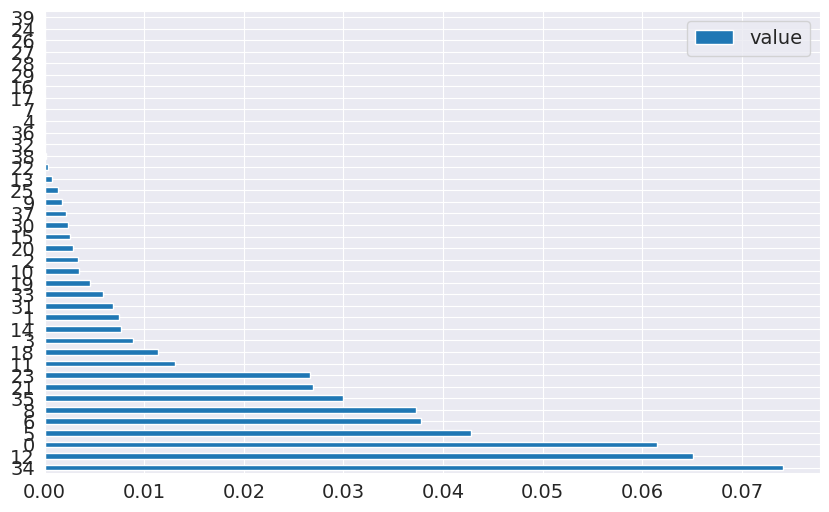

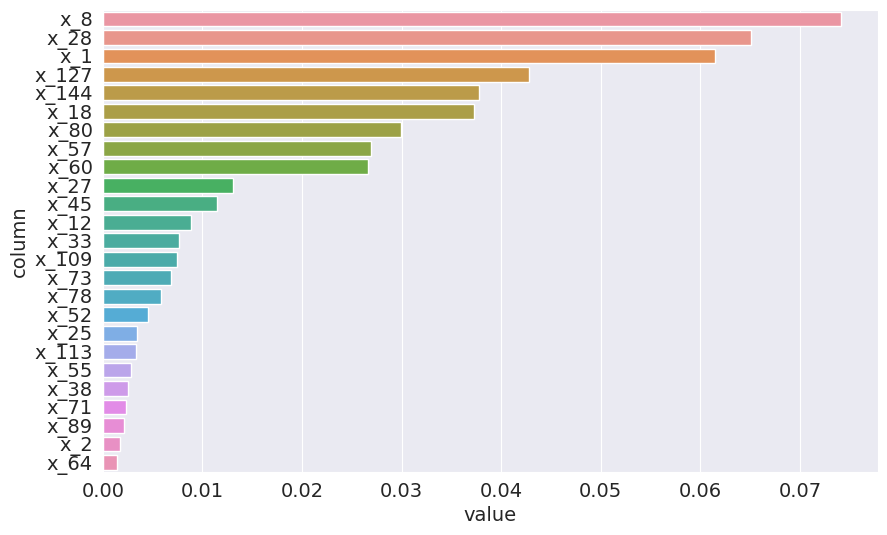

In [233]:
feat_imp = pd.DataFrame({'value':info_gains,
                        'column':names})

features_imp_1 = feat_imp.sort_values('value',ascending=False)
features_imp_1_column = features_imp_1.column
features_imp_1.plot(kind='barh')
plt.show()
sns.barplot(features_imp_1.head(25) , x = 'value', y = 'column')

mi_df = features_imp_1.head(25)

In [234]:
mi_231 = mi_df.head(23)['column']
mi_23 = []
for col in mi_231:
  mi_23.append(col)

mi_23

['x_8',
 'x_28',
 'x_1',
 'x_127',
 'x_144',
 'x_18',
 'x_80',
 'x_57',
 'x_60',
 'x_27',
 'x_45',
 'x_12',
 'x_33',
 'x_109',
 'x_73',
 'x_78',
 'x_52',
 'x_25',
 'x_113',
 'x_55',
 'x_38',
 'x_71',
 'x_89']

# Feature Selection Using `Fisher Score`

In this step, we employ the `Fisher Score` method to select the top 20 features out of our dataset of 40. Here's how it works:

1. **Feature Selection Method**:
   - We use the `SelectKBest` function with the `f_classif` scoring function, which calculates the Fisher Score for each feature.
   - The parameter `k=20` specifies that we want to select the top 20 features.

2. **Feature Transformation**:
   - We transform the original feature matrix `x` into a new feature matrix `X_new`, containing only the selected features.

3. **Displaying Selected Features and Fisher Scores**:
   - We obtain the names of the selected features using `k_best.get_support()` and store them in `selected_features`.
   - We also capture the Fisher scores for each feature in `fisher_scores`.

4. **Output**:
   - We print the names of the selected features along with their respective Fisher scores.
   - This helps us understand the significance of each feature in contributing to the prediction task.

The Fisher Score, calculated using the f_classif scoring function, is a statistical measure that assesses the difference in means between groups when considering a categorical target variable. For feature selection, it evaluates how well each individual feature discriminates between different categories or classes of the target variable. Higher Fisher Scores indicate that a feature has a stronger influence on distinguishing between target categories, making it more valuable for classification tasks. By selecting the top 20 features with the highest Fisher Scores, we focus on those features that contribute the most to the predictive power of our machine learning models.



In [235]:
from sklearn.feature_selection import SelectKBest, f_classif

k_best = SelectKBest(score_func=f_classif, k=40)
X_new = k_best.fit_transform(x, y)

# Display the selected features
selected_features = x.columns[k_best.get_support()]
fisher_scores = k_best.scores_
print(f"Selected Features: {selected_features.tolist()}")



Selected Features: ['x_1', 'x_109', 'x_113', 'x_12', 'x_124', 'x_127', 'x_144', 'x_16', 'x_18', 'x_2', 'x_25', 'x_27', 'x_28', 'x_30', 'x_33', 'x_38', 'x_42', 'x_44', 'x_45', 'x_52', 'x_55', 'x_57', 'x_59', 'x_60', 'x_62', 'x_64', 'x_67', 'x_68', 'x_7', 'x_70', 'x_71', 'x_73', 'x_77', 'x_78', 'x_8', 'x_80', 'x_83', 'x_89', 'x_91', 'x_99']


In [236]:
i = 0
dic = {}
for feature in selected_features:
  dic[feature]=fisher_scores[i]
  i=i+1

dic = dict(sorted(dic.items(), key=lambda item: -item[1]))



fs_23 = []

for i , (key, value) in  enumerate(dic.items()):
  fs_23.append(key)
  if i == 22:
    break

fs_23

['x_8',
 'x_1',
 'x_18',
 'x_80',
 'x_127',
 'x_144',
 'x_57',
 'x_60',
 'x_45',
 'x_99',
 'x_73',
 'x_52',
 'x_38',
 'x_27',
 'x_25',
 'x_28',
 'x_91',
 'x_33',
 'x_71',
 'x_64',
 'x_42',
 'x_83',
 'x_109']

# Feature Selection Using `Random Forest` Feature Importances

In this approach, we leverage a `Random Forest Classifier` to assess the importance of each feature and select the top 20. Here's how it works:

1. **Random Forest Model**:
   - We train a Random Forest Classifier with a specified number of estimators (in this case, 100) using our feature matrix `x` and target variable `y`.

2. **Feature Importances**:
   - The Random Forest model calculates feature importances based on how much each feature contributes to the overall accuracy of the model. These importances are stored in the `importances` array.

3. **Creating a DataFrame**:
   - We create a DataFrame `final_df` to organize the features and their corresponding importances.

4. **Visualization**:
   - We generate a bar plot to visualize the importance of each feature, with features sorted in descending order of importance. This visual representation aids in identifying the top 20 features.

Random Forest feature importances provide valuable insights into feature relevance for classification tasks, allowing us to prioritize the most influential features for future predictions.


<Axes: xlabel='Features'>

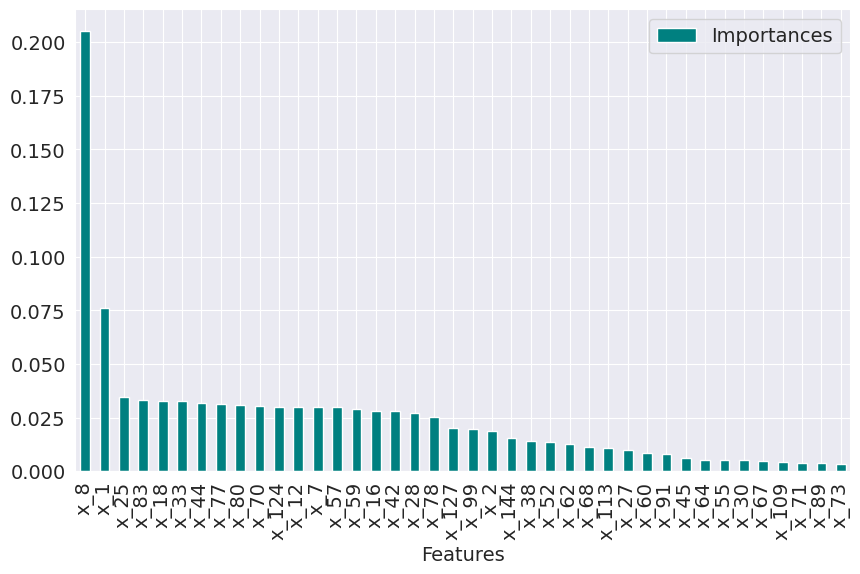

In [237]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(x, y)

importances = model.feature_importances_

final_df = pd.DataFrame({
    'Features': pd.DataFrame(x).columns,
    'Importances': importances
})

# Set the 'Features' column as the index
final_df.set_index('Features', inplace=True)

# Sort the DataFrame by 'Importances' in descending order
final_df = final_df.sort_values('Importances', ascending=False)

final_df.plot.bar(color='teal')


# Validation of `features` using `Logistic Regression`.

- Here we use `logistic regression` to train our model and find the accuracy of our model.
- We do training and testing by choosing the best features based on the weights of the model trained.
- We first use all 40 features to train and test the accuracy.
- Then choose the top 25 features based on their weights from this and then use this to train and test the accuracy.
- From this, we select final top 20 features based on weights.

In [238]:
import opendatasets as od
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
import plotly as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [239]:
path = '/content/convolve2-epoch-1/Dataset.csv'


In [240]:
submission = '/content/convolve2-epoch-1/sample_submission - Sheet1 (1).csv'

In [241]:
raw_df = pd.read_csv(path)


In [242]:
raw_df.head()

,Unnamed: 0,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,...,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99,y
0,0,5099,1,5,156,35,-2,1,40,999,...,0.11,629,14,487,-0.31,115,0.02,-0.10,-0.49,0
1,1,5191,0,1,164,16,1,5,4,999,...,0.11,509,26,346,-0.31,317,0.02,0.24,-0.21,0
2,2,5228,1,0,774,75,1,5,12,999,...,0.11,1058,30,227,-0.31,464,0.02,-0.10,-0.21,0
3,3,5228,1,1,747,4,1,5,69,999,...,0.11,1048,4,17,-0.31,39,-0.18,-0.10,-0.21,0
4,4,5196,1,5,29,28,0,4,32,999,...,0.11,993,22,58,-0.31,492,0.02,-0.10,0.21,0


In [243]:
target_column = 'y'
target = raw_df['y']

In [244]:
train_df, val_df = train_test_split(raw_df, test_size=0.3, random_state=42)

In [245]:
train_df.shape

(2883, 42)

In [246]:
val_df.shape

(1236, 42)

In [247]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'y'

In [248]:
def all_no(inputs):
    return np.full(len(inputs), 0)

# Base Accuracy Benchmark

If we have a model that always predicts 0, it would have the below accuracy, which is due to the nature of the dataset. Any model that we make should beat this benchmark accuracy for any meaningful progress.



In [249]:
#base model of all no's
x = accuracy_score(raw_df['y'], all_no(raw_df[input_cols]))
x

0.890507404709881

In [250]:
def no_of_features(x):
  test_cols = []
  for columns in weights_mod['feature'].head(x):
    test_cols.append(columns)

  model.fit(train_inputs[test_cols], train_targets)

  train_preds = model.predict(X_train[test_cols])

  train_acc = accuracy_score(train_targets,train_preds)

  val_preds = model.predict(X_val[test_cols])

  val_acc = accuracy_score(val_targets,val_preds)
  return train_acc, val_acc

In [251]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(raw_df[input_cols])

MinMaxScaler()

In [252]:
def preprocess(raw_df):
  train_df, val_df = train_test_split(raw_df, test_size=0.3, random_state=42)
  test_df , val_df = train_test_split(val_df,test_size=0.5,random_state=42)
  train_inputs = train_df[input_cols].copy()
  train_targets = train_df[target_col].copy()

  print(train_inputs.shape)

  val_inputs = val_df[input_cols].copy()
  val_targets = val_df[target_col].copy()

  test_inputs = test_df[input_cols].copy()
  test_targets = test_df[target_col].copy()

  train_inputs[input_cols] = scaler.transform(train_inputs[input_cols])
  val_inputs[input_cols] = scaler.transform(val_inputs[input_cols])
  test_inputs[input_cols] = scaler.transform(test_inputs[input_cols])

  X_train = train_inputs[input_cols]
  train_test = train_targets
  X_val = val_inputs[input_cols]
  val_test = val_targets
  X_test = test_inputs[input_cols]
  test_test = test_targets
  print(X_train.shape,train_test.shape)
  return X_train , X_val , X_test , train_test , val_test , test_test

In [253]:
def try_model(model):
    # Fit the model

    model.fit(X_train, train_targets)

    # Generate predictions
    train_preds = model.predict(X_train)

    val_preds = model.predict(X_val)

    # test_preds = model.predict(X_test)

    train_acc = accuracy_score(train_targets,train_preds)
    # print(train_targets.shape , train_preds.shape)
    val_acc = accuracy_score(val_targets,val_preds)

    # test_acc = accuracy_score(test_targets,test_preds)


    return train_acc, val_acc



# 40 Features

In [254]:
X_train , X_val ,X_test , train_targets , val_targets , test_targets = preprocess(raw_df)

(2883, 40)
(2883, 40) (2883,)


In [255]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train,train_targets)

LogisticRegression(solver='liblinear')

In [256]:
try_model(model)

(0.9115504682622269, 0.9142394822006472)

<Axes: xlabel='weights', ylabel='feature'>

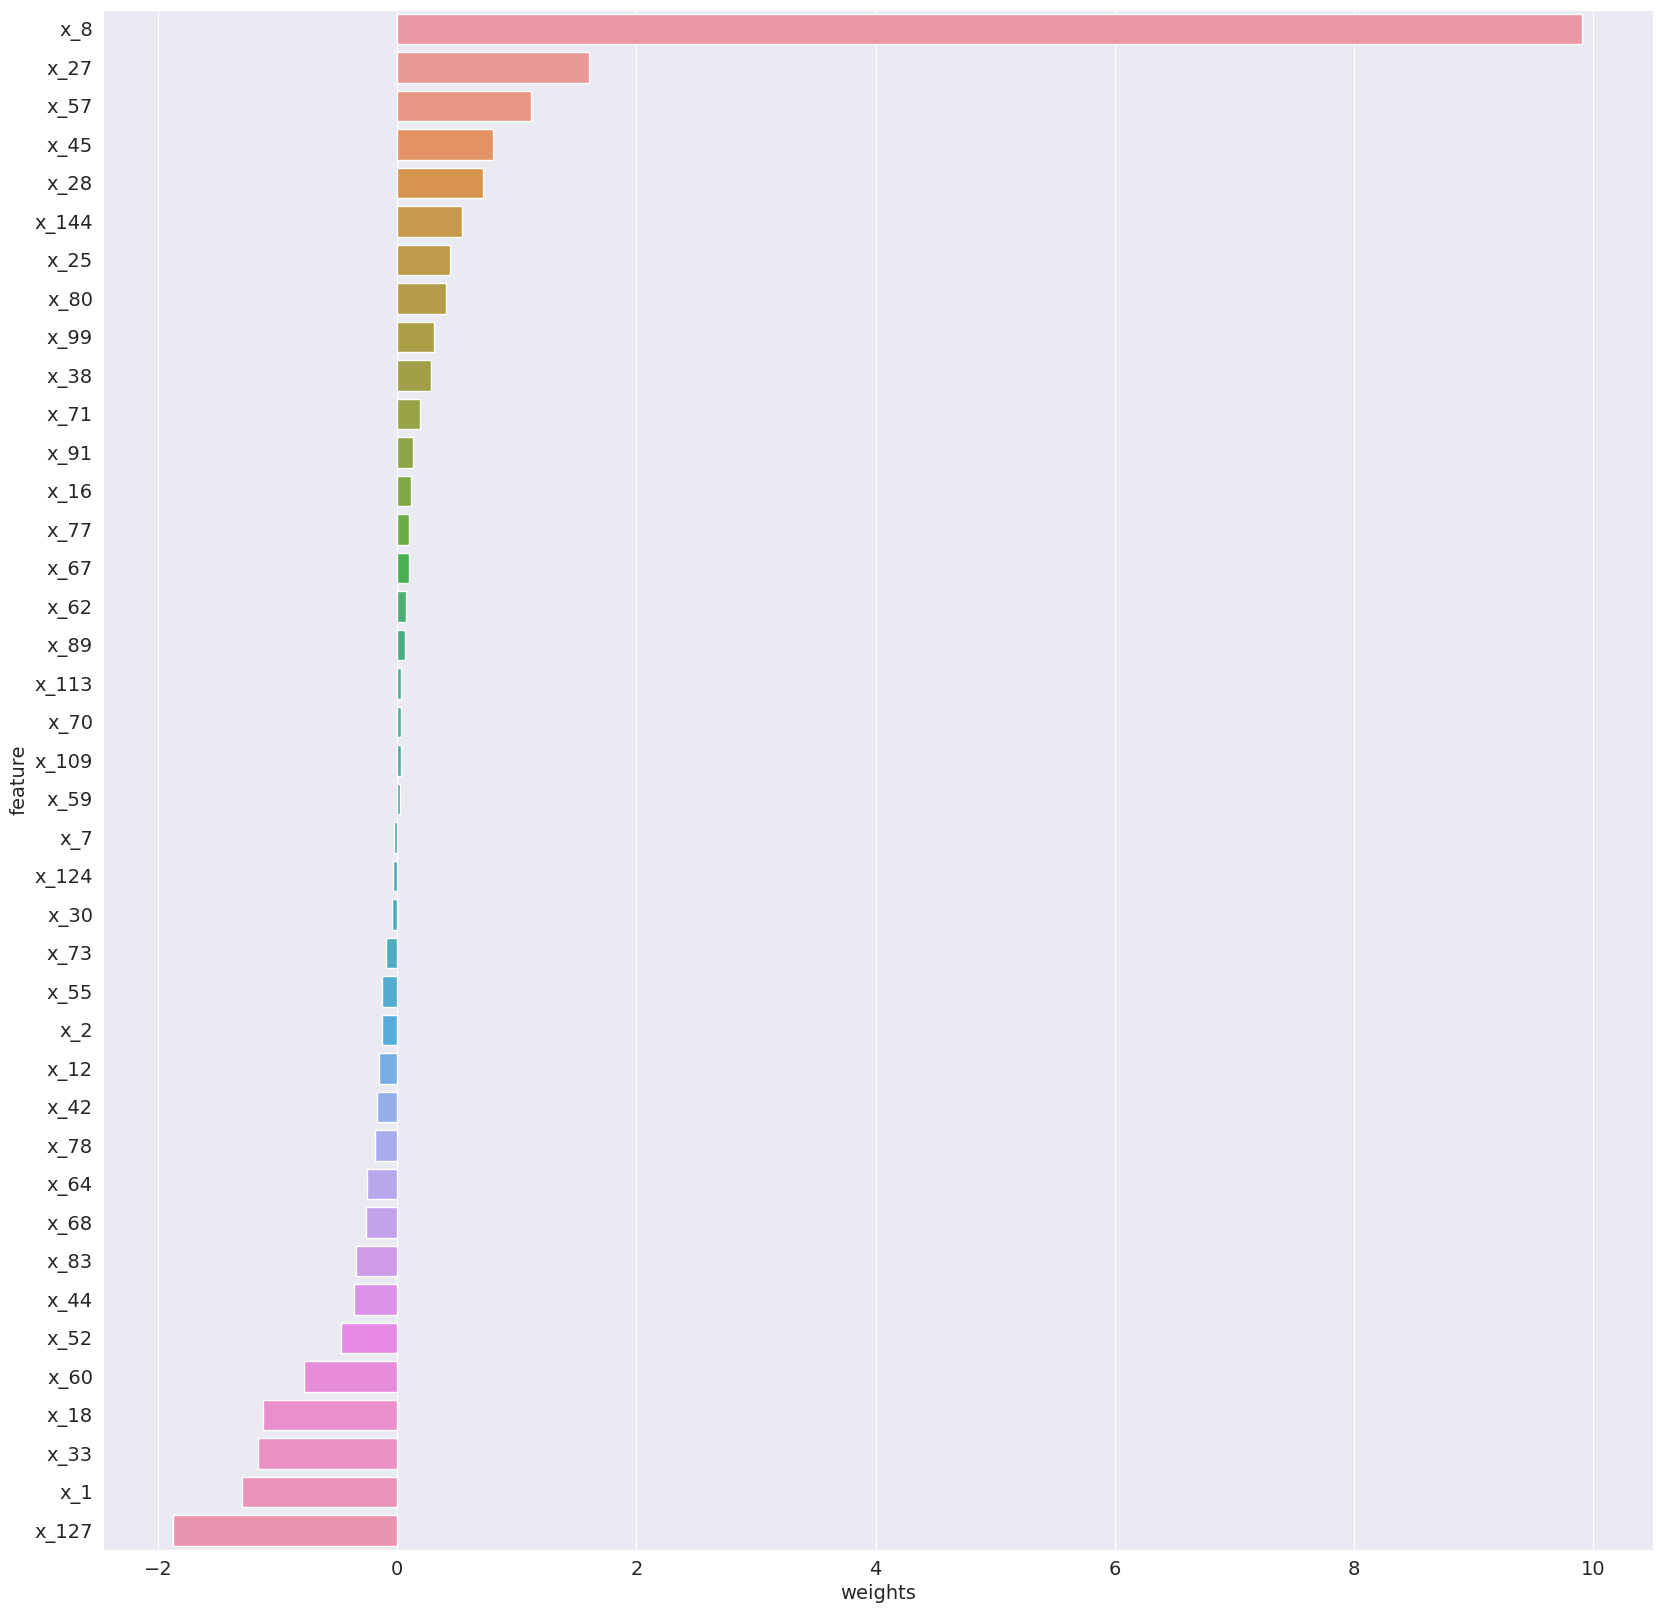

In [257]:
x = model.coef_.tolist()

weights = pd.DataFrame({
    'feature':input_cols,
    'weights': x[0]
}).sort_values('weights',ascending=False)
weights
plt.figure(figsize=(20,20))
sns.barplot(data = weights , x='weights' , y = 'feature')



<Axes: xlabel='weights', ylabel='feature'>

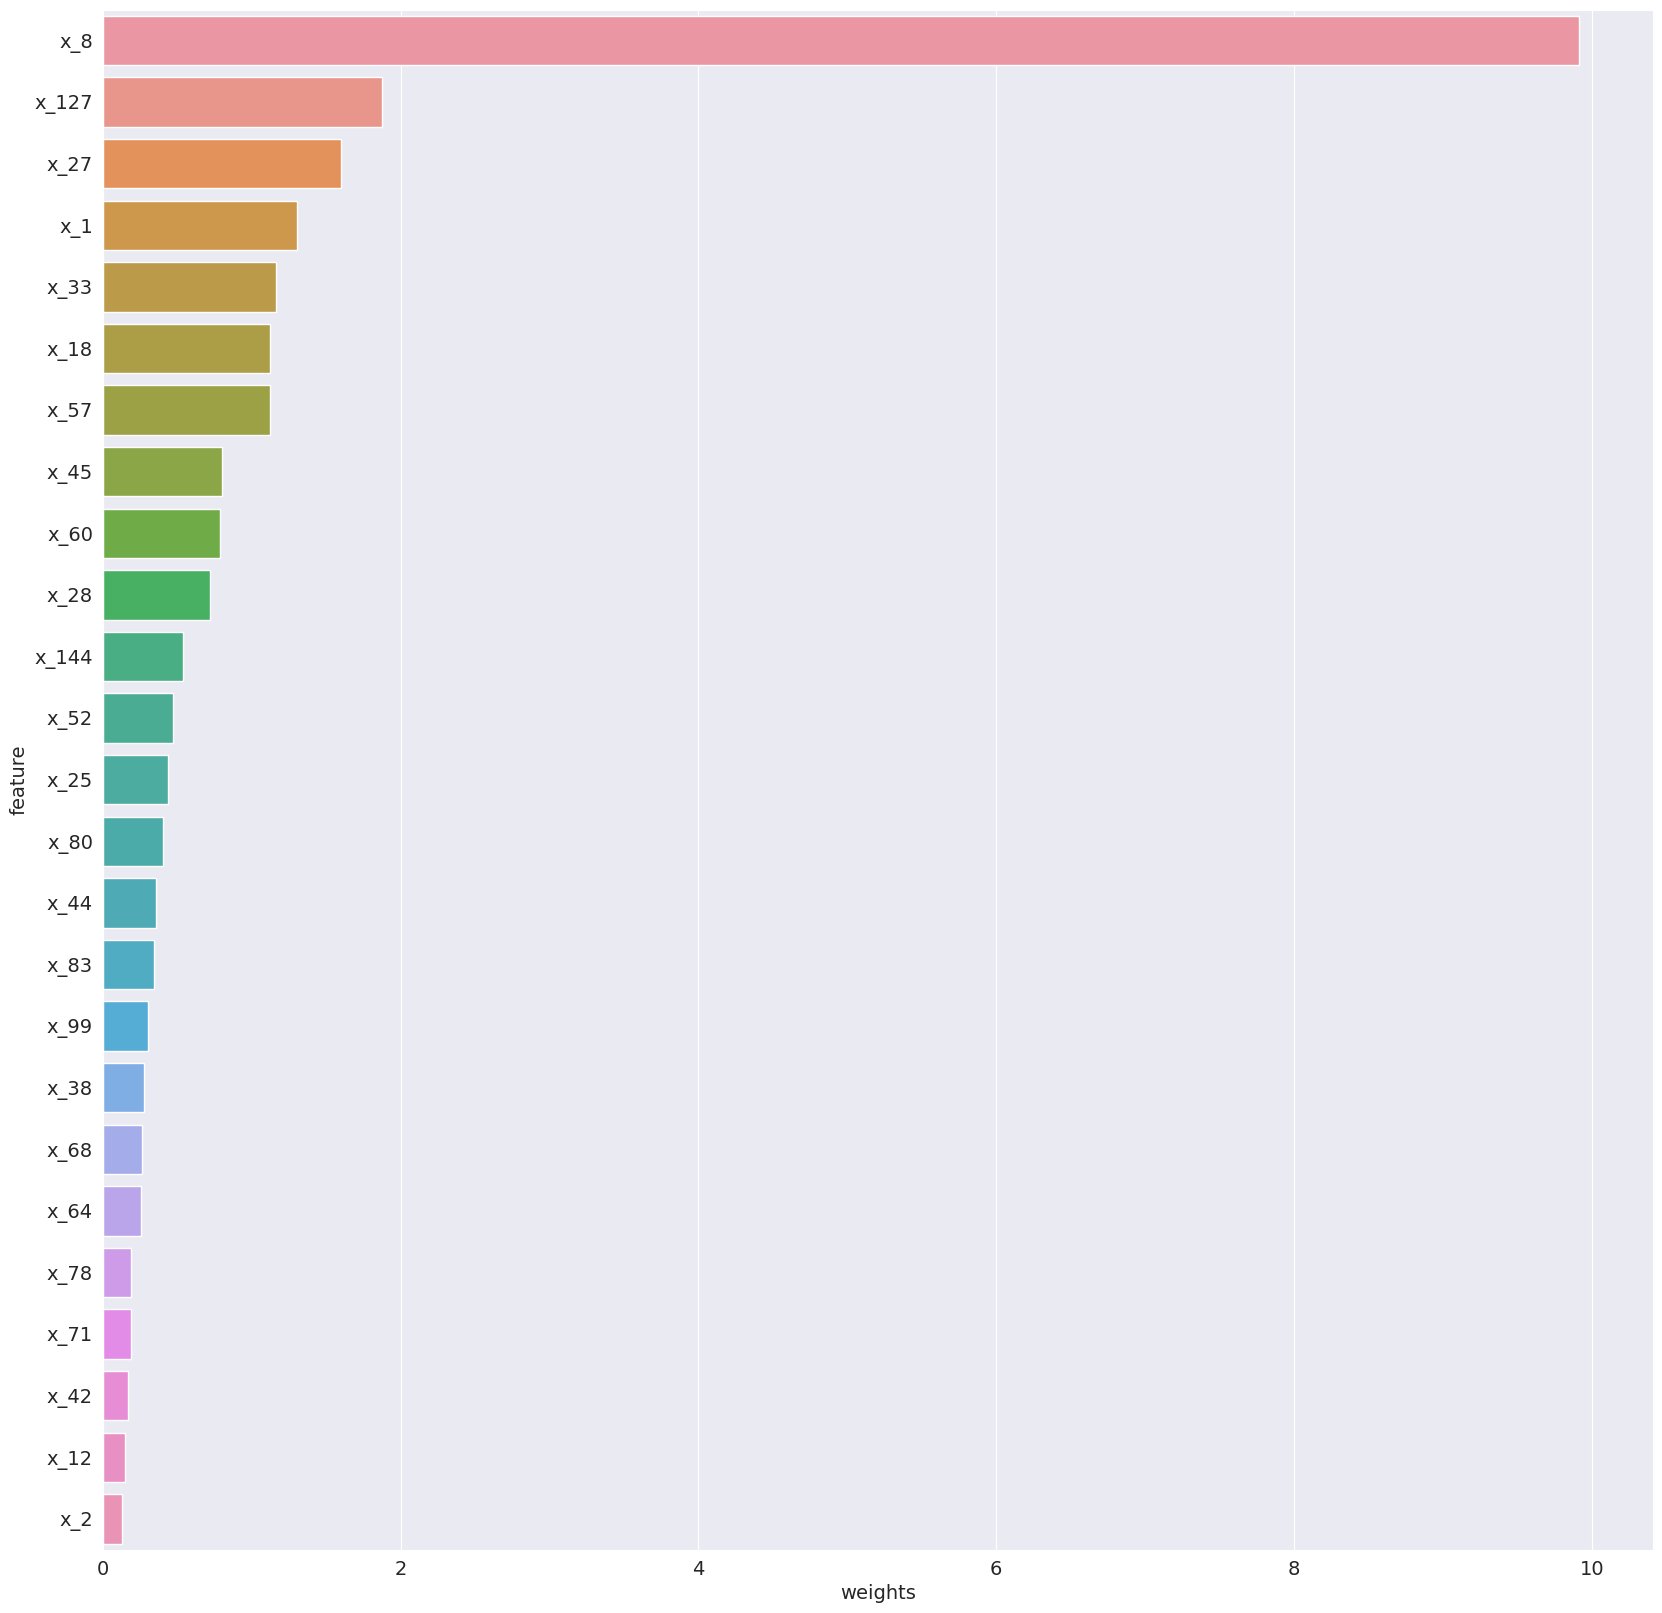

In [258]:
weights_mod = pd.DataFrame({
    'feature':input_cols,
    'weights': [abs(y) for y in x[0] ]
}).sort_values('weights',ascending=False)
weights_mod
plt.figure(figsize=(20,20))
sns.barplot(data = weights_mod.head(25) , x='weights' , y = 'feature')

In [259]:
lr_23 = weights_mod.head(23)['feature'].tolist()
lr_23

['x_8',
 'x_127',
 'x_27',
 'x_1',
 'x_33',
 'x_18',
 'x_57',
 'x_45',
 'x_60',
 'x_28',
 'x_144',
 'x_52',
 'x_25',
 'x_80',
 'x_44',
 'x_83',
 'x_99',
 'x_38',
 'x_68',
 'x_64',
 'x_78',
 'x_71',
 'x_42']

# 25 Features

In [260]:
top_25_df = weights_mod.head(25)
top_25_cols = top_25_df['feature']

In [261]:
top_25_cols

34      x_8
5     x_127
11     x_27
0       x_1
14     x_33
8      x_18
21     x_57
18     x_45
23     x_60
12     x_28
6     x_144
19     x_52
10     x_25
35     x_80
17     x_44
36     x_83
39     x_99
15     x_38
27     x_68
25     x_64
33     x_78
30     x_71
16     x_42
3      x_12
9       x_2
Name: feature, dtype: object

In [262]:
updated_df = raw_df[top_25_cols]

In [263]:
updated_df['y'] = raw_df['y']

<ipython-input-263-a938b3d4aacf>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [264]:
input_cols = top_25_cols

In [265]:
raw_df['y']

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int64

In [266]:
updated_df

,x_8,x_127,x_27,x_1,x_33,x_18,x_57,x_45,x_60,x_28,...,x_99,x_38,x_68,x_64,x_78,x_71,x_42,x_12,x_2,y
0,487,-2,93,5099,14.57,999,-0.56,0.29,0,-46,...,-0.49,-0.40,-0.01,1,14,1,26,156,7,0
1,346,1,94,5191,1.22,999,-0.56,-0.80,0,-36,...,-0.21,-0.04,-0.01,1,26,0,24,164,5,0
2,227,1,94,5228,54.26,999,0.19,-0.80,0,-42,...,-0.21,-0.04,-0.05,0,30,0,12,774,4,0
3,17,1,94,5228,35.49,999,0.19,-0.80,0,-42,...,-0.21,-0.40,-0.01,1,4,1,22,747,3,0
4,58,0,93,5196,25.40,999,-0.13,0.29,0,-42,...,0.21,0.20,0.06,0,22,0,4,29,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,53,1,94,5228,75.14,999,-0.30,0.29,0,-43,...,0.21,-0.37,0.03,0,23,1,29,197,4,0
4115,219,1,94,5228,11.16,999,-0.30,-0.80,0,-43,...,0.21,-0.04,-0.01,0,6,1,22,949,6,0
4116,64,-2,93,5099,4.96,999,-0.56,0.29,1,-46,...,0.93,-0.04,0.06,0,16,0,4,478,1,0
4117,528,1,93,5228,8.95,999,-0.08,0.29,0,-36,...,0.21,-0.04,-0.01,0,21,0,11,554,0,0


In [267]:
scaler.fit(raw_df[input_cols])

MinMaxScaler()

In [268]:
X_train , X_val ,X_test , train_targets , val_targets , test_targets = preprocess(updated_df)

(2883, 25)
(2883, 25) (2883,)


In [269]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train,train_targets)

LogisticRegression(solver='liblinear')

In [270]:
try_model(model)

(0.9118973291710024, 0.9158576051779935)

In [271]:
x = model.coef_.tolist()

In [272]:
weights_mod = pd.DataFrame({
    'feature':input_cols,
    'weights': [abs(y) for y in x[0] ]
}).sort_values('weights',ascending=False)
weights_mod

,feature,weights
34,x_8,9.886918
5,x_127,1.863080
11,x_27,1.630336
0,x_1,1.275782
14,x_33,1.158487
8,x_18,1.133653
21,x_57,1.117933
18,x_45,0.807182
23,x_60,0.769000
12,x_28,0.746492


<Axes: xlabel='weights', ylabel='feature'>

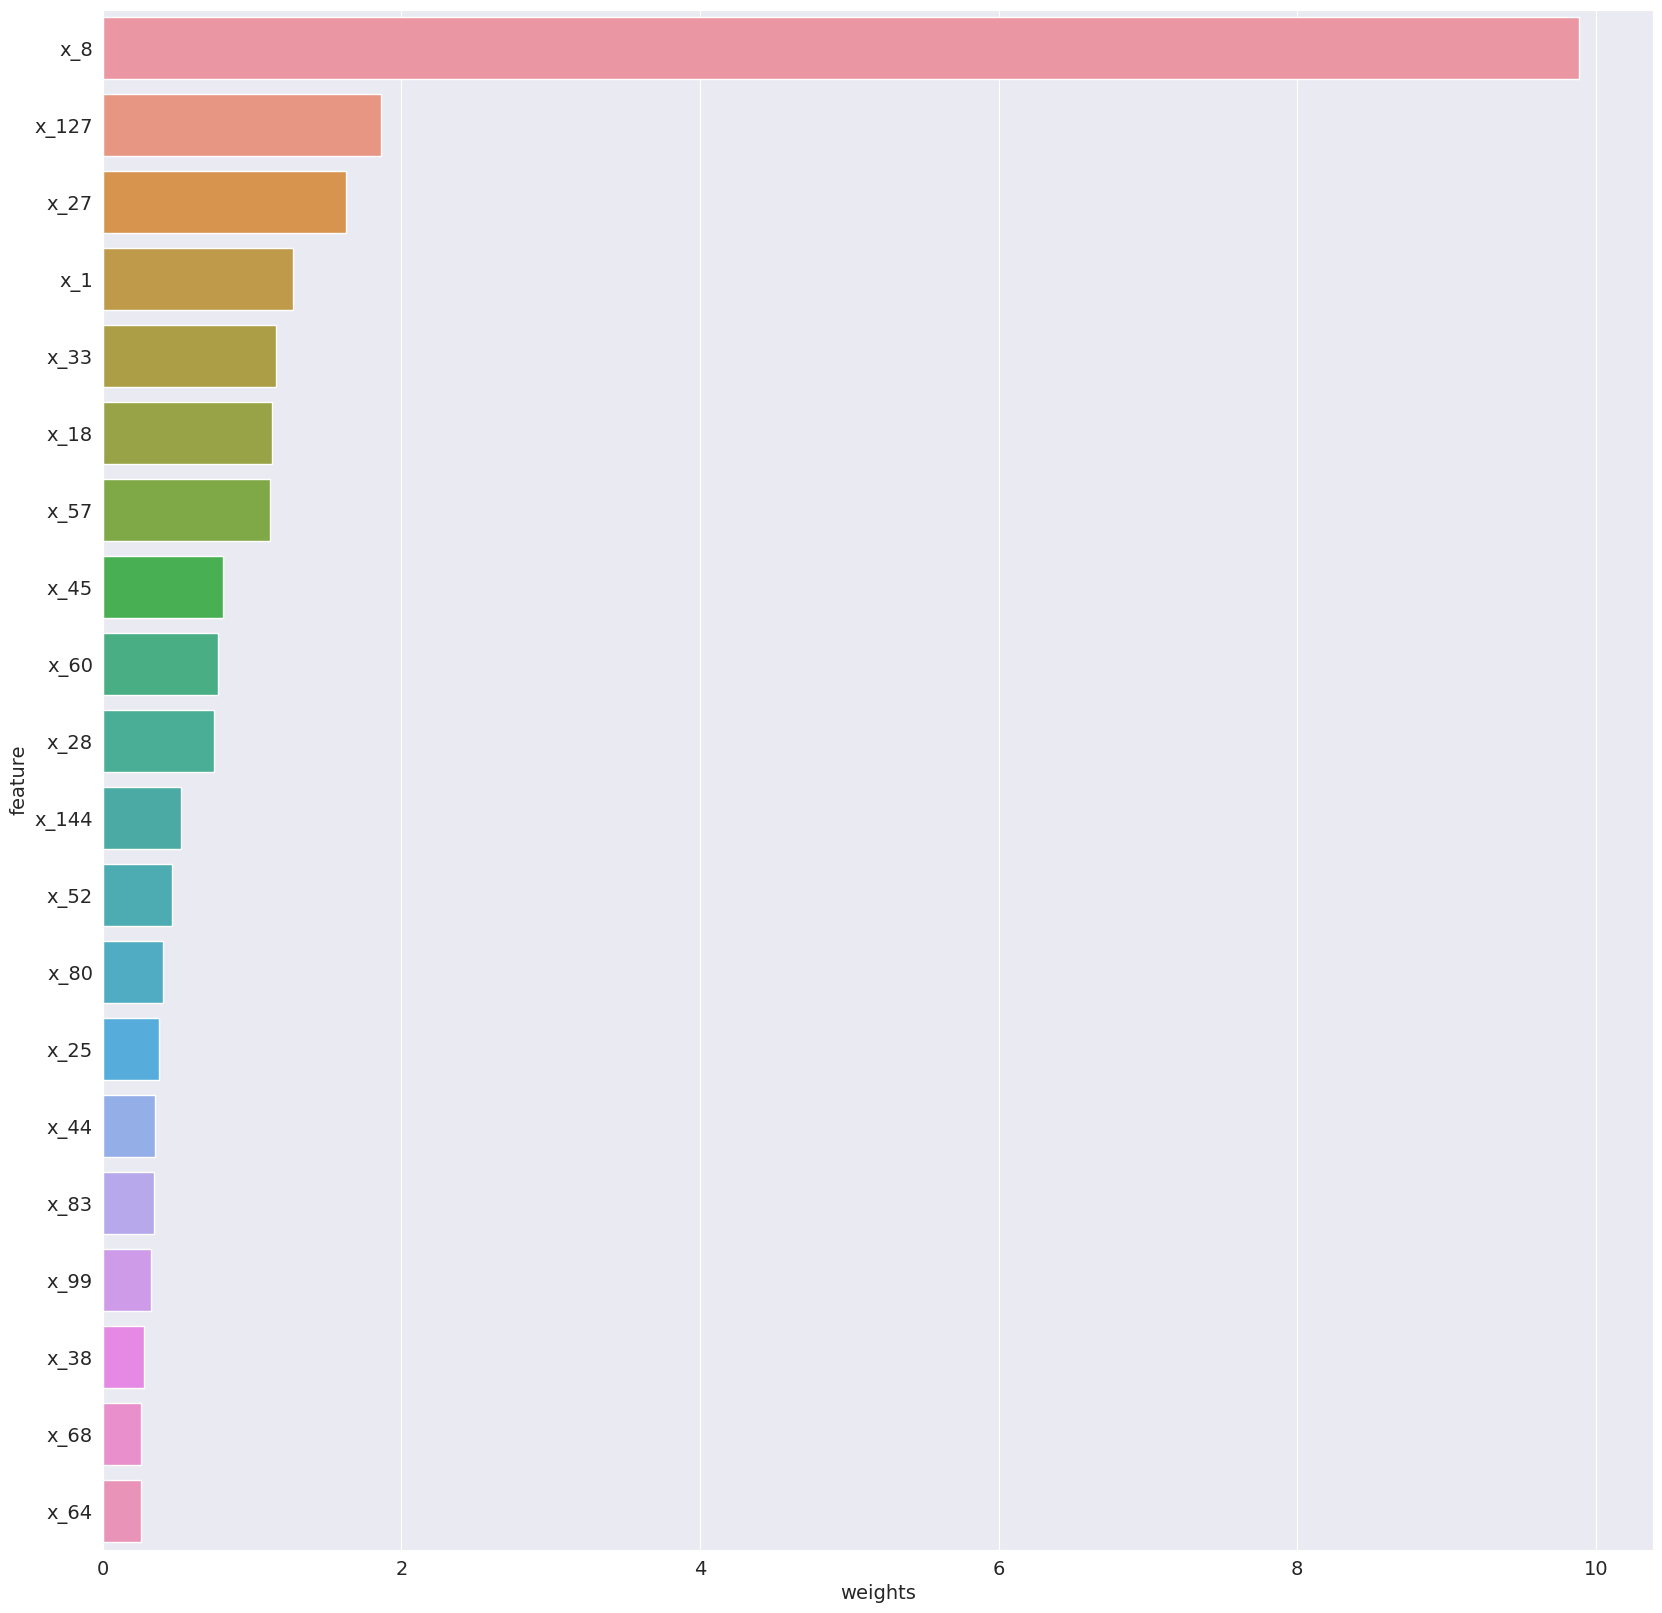

In [273]:
plt.figure(figsize=(20,20))
sns.barplot(data = weights_mod.head(20) , x='weights' , y = 'feature')

### My analysis

---

In [274]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the feature and method lists
feature_lists = [
    correlation_23,
    mi_23,
    fs_23,
    lr_23]

# Create a DataFrame from the feature_lists
df = pd.DataFrame(feature_lists).T



In [275]:
feature_selection_methods = ['Correlation' , 'Mutual info classifier', 'Fischer Score', 'Logistic Regression']
feature_total_map = {method: {} for method in feature_selection_methods}

for column in raw_df.columns[1:-1]:
    for method in feature_selection_methods:
        if method == 'Correlation':
            if column in correlation_23:
                feature_total_map[method][column] = 1
            else:
                feature_total_map[method][column] = 0
        elif method == 'Mutual info classifier':
            if column in mi_23:
                feature_total_map[method][column] = 1
            else:
                feature_total_map[method][column] = 0
        elif method == 'Fischer Score':
            if column in fs_23:
                feature_total_map[method][column] = 1
            else:
                feature_total_map[method][column] = 0
        elif method == 'Logistic Regression':
            if column in lr_23:
                feature_total_map[method][column] = 1
            else:
                feature_total_map[method][column] = 0

print(feature_total_map)


{'Correlation': {'x_1': 0, 'x_109': 1, 'x_113': 1, 'x_12': 1, 'x_124': 0, 'x_127': 0, 'x_144': 0, 'x_16': 0, 'x_18': 0, 'x_2': 1, 'x_25': 1, 'x_27': 0, 'x_28': 1, 'x_30': 0, 'x_33': 0, 'x_38': 1, 'x_42': 0, 'x_44': 0, 'x_45': 1, 'x_52': 0, 'x_55': 1, 'x_57': 1, 'x_59': 0, 'x_60': 1, 'x_62': 0, 'x_64': 0, 'x_67': 1, 'x_68': 1, 'x_7': 1, 'x_70': 1, 'x_71': 1, 'x_73': 1, 'x_77': 1, 'x_78': 0, 'x_8': 1, 'x_80': 1, 'x_83': 0, 'x_89': 1, 'x_91': 1, 'x_99': 1}, 'Mutual info classifier': {'x_1': 1, 'x_109': 1, 'x_113': 1, 'x_12': 1, 'x_124': 0, 'x_127': 1, 'x_144': 1, 'x_16': 0, 'x_18': 1, 'x_2': 0, 'x_25': 1, 'x_27': 1, 'x_28': 1, 'x_30': 0, 'x_33': 1, 'x_38': 1, 'x_42': 0, 'x_44': 0, 'x_45': 1, 'x_52': 1, 'x_55': 1, 'x_57': 1, 'x_59': 0, 'x_60': 1, 'x_62': 0, 'x_64': 0, 'x_67': 0, 'x_68': 0, 'x_7': 0, 'x_70': 0, 'x_71': 1, 'x_73': 1, 'x_77': 0, 'x_78': 1, 'x_8': 1, 'x_80': 1, 'x_83': 0, 'x_89': 1, 'x_91': 0, 'x_99': 0}, 'Fischer Score': {'x_1': 1, 'x_109': 1, 'x_113': 0, 'x_12': 0, 'x_124': 

In [292]:
voting_map =  {column : [] for column in raw_df.columns[1:-1]}


for column in raw_df.columns[1:-1]:
  for method in feature_selection_methods:
    voting_map[column].append(feature_total_map[method][column])

voting_df = pd.DataFrame.from_dict(voting_map, orient='index', columns=feature_selection_methods)

transposed_voting_df=  voting_df.T
transposed_voting_df

,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,x_2,x_25,...,x_71,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99
Correlation,1,1,1,0,0,0,0,0,1,1,...,1,1,1,0,1,1,0,1,1,1
Mutual info classifier,1,1,1,0,1,1,0,1,0,1,...,1,1,0,1,1,1,0,1,0,0
Fischer Score,1,0,0,0,1,1,0,1,0,1,...,1,1,0,0,1,1,1,0,1,1
Logistic Regression,0,0,0,0,1,1,0,1,0,1,...,1,0,0,1,1,1,1,0,0,1


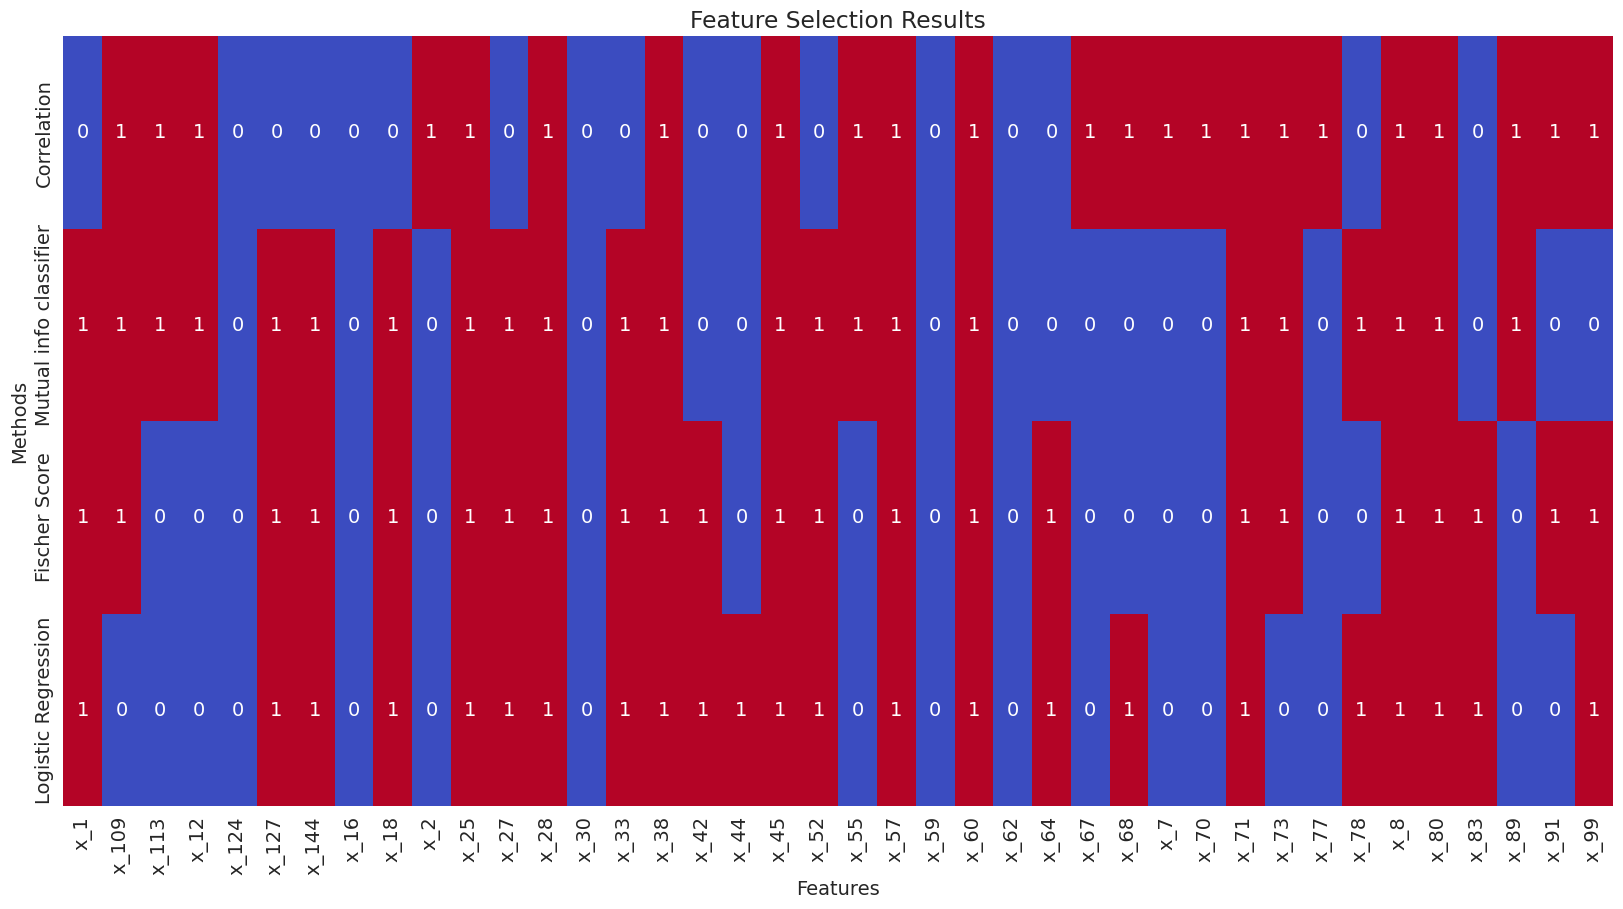

In [277]:
plt.figure(figsize=(20,10))
sns.heatmap(transposed_voting_df, cmap="coolwarm", annot=True, fmt="d", cbar=False, xticklabels=True, yticklabels=True)
plt.title("Feature Selection Results")
plt.xlabel("Features")
plt.ylabel("Methods")
plt.show()

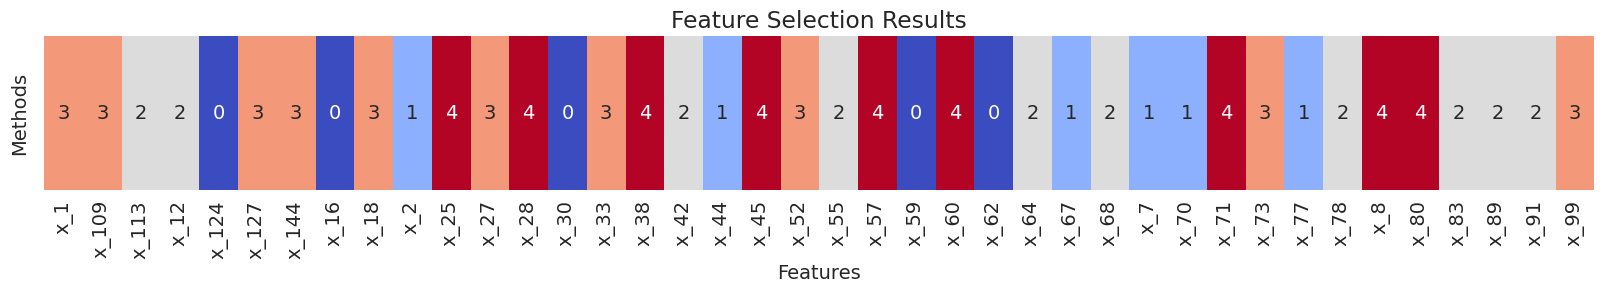

In [278]:
sum_row = transposed_voting_df.sum().to_frame()
sum_row.columns = ['']

plt.figure(figsize=(20, 2))
sns.heatmap(sum_row.T, cmap="coolwarm", annot=True, fmt="d", cbar=False, xticklabels=True, yticklabels=True)
plt.title("Feature Selection Results")
plt.xlabel("Features")
plt.ylabel("Methods")
plt.show()

In [282]:
raw_df = raw_df.drop('Unnamed: 0', axis=1)
raw_df

,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,x_2,...,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99,y
0,5099,1,5,156,35,-2,1,40,999,7,...,0.11,629,14,487,-0.31,115,0.02,-0.10,-0.49,0
1,5191,0,1,164,16,1,5,4,999,5,...,0.11,509,26,346,-0.31,317,0.02,0.24,-0.21,0
2,5228,1,0,774,75,1,5,12,999,4,...,0.11,1058,30,227,-0.31,464,0.02,-0.10,-0.21,0
3,5228,1,1,747,4,1,5,69,999,3,...,0.11,1048,4,17,-0.31,39,-0.18,-0.10,-0.21,0
4,5196,1,5,29,28,0,4,32,999,6,...,0.11,993,22,58,-0.31,492,0.02,-0.10,0.21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,5228,1,5,197,82,1,5,6,999,4,...,0.11,672,23,53,-0.31,474,-0.07,-0.10,0.21,0
4115,5228,1,5,949,72,1,5,2,999,6,...,0.11,1058,6,219,-0.31,475,0.02,-0.10,0.21,0
4116,5099,1,1,478,41,-2,1,25,999,1,...,0.11,1240,16,64,0.35,210,0.02,0.24,0.93,0
4117,5228,1,0,554,36,1,5,68,999,0,...,0.11,1152,21,528,-0.31,49,0.02,-0.10,0.21,0


In [284]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming raw_df is your DataFrame
raw_df


# Separating features and target
X = raw_df.drop('y', axis=1)
y = raw_df['y']

# Standardize the features (important for some algorithms like PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Strategy 1: Correlation Analysis
correlation = X.corrwith(y).abs().sort_values(ascending=False)

# Strategy 2: Feature Importance using RandomForest
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Strategy 3: Univariate Feature Selection
select_k_best = SelectKBest(f_classif, k=20).fit(X, y)
top_univariate_features = X.columns[select_k_best.get_support()]

# Strategy 4: Recursive Feature Elimination
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=20)
rfe.fit(X, y)
top_rfe_features = X.columns[rfe.support_]

# Strategy 5: PCA
pca = PCA(n_components=20)
pca.fit(X_scaled)
pca_features = [X.columns[i] for i in range(len(X.columns)) if i in pca.components_[0].argsort()[-20:]]

# Combining Results
combined_features = set(top_univariate_features) | set(top_rfe_features) | set(pca_features)
top_23_features_combined_1 = list(combined_features)[:23]  # Selecting top 20

print("Top 23 Features:", top_23_features_combined_1)

Top 23 Features: ['x_28', 'x_77', 'x_16', 'x_83', 'x_12', 'x_59', 'x_45', 'x_18', 'x_42', 'x_91', 'x_80', 'x_78', 'x_68', 'x_1', 'x_144', 'x_127', 'x_27', 'x_71', 'x_8', 'x_38', 'x_73', 'x_7', 'x_33']


In [286]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import chi2, mutual_info_classif, SelectFromModel
from sklearn.linear_model import LassoCV
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance


# Strategy 6: Chi-Squared Test
chi2_values, chi2_p_values = chi2(abs(X), y)
chi2_features = X.columns[chi2_p_values < 0.05]  # Selecting features with p-value < 0.05

# Strategy 7: Information Gain
info_gain = mutual_info_classif(X, y)
info_gain_features = X.columns[info_gain > 0.01]  # Threshold can be adjusted

# Strategy 8: L1 (Lasso) Regularization
lasso = LassoCV().fit(X, y)
lasso_features = X.columns[lasso.coef_ != 0]

# Strategy 9: Model-Based Feature Importance with XGBoost
xgb = XGBClassifier()
xgb.fit(X, y)
xgb_features = X.columns[xgb.feature_importances_ > 0.01]  # Threshold can be adjusted

# Strategy 10: Permutation Importance
gb = GradientBoostingClassifier().fit(X, y)
perm_importance = permutation_importance(gb, X, y, n_repeats=30)
perm_features = X.columns[perm_importance.importances_mean > 0.01]  # Threshold can be adjusted

# Combining Results
combined_features =  set(info_gain_features) | set(lasso_features) | set(xgb_features) | set(perm_features) | set(chi2_features)

# Selecting top features based on combined strategies
top_23_features_combined_2 = list(combined_features)[:23]

print("Selected Features:", top_23_features_combined_2)

Selected Features: ['x_28', 'x_77', 'x_16', 'x_12', 'x_30', 'x_62', 'x_59', 'x_45', 'x_18', 'x_42', 'x_91', 'x_80', 'x_68', 'x_78', 'x_1', 'x_144', 'x_127', 'x_27', 'x_8', 'x_38', 'x_73', 'x_7', 'x_33']


In [288]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.4 MB/s eta 0:00:00


In [289]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap
from itertools import combinations

# Separating features and target
X = raw_df.drop('y', axis=1)
y = raw_df['y']

# Strategy 1: Creating Interaction Terms
interaction_terms = []
for col1, col2 in combinations(X.columns, 2):
    interaction_terms.append(X[col1] * X[col2])

# Create a DataFrame for interaction terms
interaction_terms_df = pd.DataFrame(interaction_terms).T
interaction_terms_df.columns = [col1 + "_" + col2 for col1, col2 in combinations(X.columns, 2)]
interaction_terms_df.index = X.index

# Add interaction terms to the dataset
X_extended = pd.concat([X, interaction_terms_df], axis=1)

# Strategy 2 & 4: Splitting data for SHAP analysis
X_train, X_test, y_train, y_test = train_test_split(X_extended, y, test_size=0.3, random_state=42)

# Complex Model (Random Forest) and SHAP Analysis
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Calculate SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Summarize the SHAP values
shap_sum = np.abs(shap_values[1]).mean(axis=0)
importance_df = pd.DataFrame({'feature': X_extended.columns, 'shap_importance': shap_sum})
importance_df = importance_df.sort_values('shap_importance', ascending=False)

# Strategy 3: Partial Dependence Plots
# Note: Partial dependence plots code would be here, but it's not included in this fragment.

# Custom Selection (Strategy 5)
# Select top features based on combined SHAP importance and domain knowledge
top_23_features_combined_3 = importance_df['feature'].head(23).tolist()

print("Selected Features:", top_23_features_combined_3)

Selected Features: ['x_25_x_8', 'x_28_x_8', 'x_8', 'x_127_x_8', 'x_1_x_144', 'x_1_x_27', 'x_27_x_8', 'x_18_x_8', 'x_8_x_80', 'x_1_x_8', 'x_1', 'x_45_x_8', 'x_77_x_8', 'x_1_x_18', 'x_73_x_8', 'x_144_x_28', 'x_8_x_91', 'x_8_x_89', 'x_144_x_8', 'x_1_x_80', 'x_78_x_8', 'x_70_x_8', 'x_127_x_77']


In [303]:
feature_selection_methods_parth = ['Parth-1', 'Parth-2']
feature_total_map_parth = {method: {} for method in feature_selection_methods_parth}

for column in raw_df.columns[:-1]:
    for method in feature_selection_methods_parth:
        if method == 'Parth-1':
            if column in top_23_features_combined_1:
                feature_total_map_parth[method][column] = 1
            else:
                feature_total_map_parth[method][column] = 0
        elif method == 'Parth-2':
            if column in top_23_features_combined_2:
                feature_total_map_parth[method][column] = 1
            else:
                feature_total_map_parth[method][column] = 0

print(feature_total_map_parth)

{'Parth-1': {'x_1': 1, 'x_109': 0, 'x_113': 0, 'x_12': 1, 'x_124': 0, 'x_127': 1, 'x_144': 1, 'x_16': 1, 'x_18': 1, 'x_2': 0, 'x_25': 0, 'x_27': 1, 'x_28': 1, 'x_30': 0, 'x_33': 1, 'x_38': 1, 'x_42': 1, 'x_44': 0, 'x_45': 1, 'x_52': 0, 'x_55': 0, 'x_57': 0, 'x_59': 1, 'x_60': 0, 'x_62': 0, 'x_64': 0, 'x_67': 0, 'x_68': 1, 'x_7': 1, 'x_70': 0, 'x_71': 1, 'x_73': 1, 'x_77': 1, 'x_78': 1, 'x_8': 1, 'x_80': 1, 'x_83': 1, 'x_89': 0, 'x_91': 1, 'x_99': 0}, 'Parth-2': {'x_1': 1, 'x_109': 0, 'x_113': 0, 'x_12': 1, 'x_124': 0, 'x_127': 1, 'x_144': 1, 'x_16': 1, 'x_18': 1, 'x_2': 0, 'x_25': 0, 'x_27': 1, 'x_28': 1, 'x_30': 1, 'x_33': 1, 'x_38': 1, 'x_42': 1, 'x_44': 0, 'x_45': 1, 'x_52': 0, 'x_55': 0, 'x_57': 0, 'x_59': 1, 'x_60': 0, 'x_62': 1, 'x_64': 0, 'x_67': 0, 'x_68': 1, 'x_7': 1, 'x_70': 0, 'x_71': 0, 'x_73': 1, 'x_77': 1, 'x_78': 1, 'x_8': 1, 'x_80': 1, 'x_83': 0, 'x_89': 0, 'x_91': 1, 'x_99': 0}}


In [304]:
voting_map_parth =  {column : [] for column in raw_df.columns[:-1]}


for column in raw_df.columns[:-1]: # for summarization needs a bit of change
  for method in feature_selection_methods_parth:
    voting_map_parth[column].append(feature_total_map_parth[method][column])

voting_df_parth = pd.DataFrame.from_dict(voting_map_parth, orient='index', columns=feature_selection_methods_parth)

transposed_voting_df_parth =  voting_df_parth.T
transposed_voting_df_parth

,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,x_2,...,x_71,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99
Parth-1,1,0,0,1,0,1,1,1,1,0,...,1,1,1,1,1,1,1,0,1,0
Parth-2,1,0,0,1,0,1,1,1,1,0,...,0,1,1,1,1,1,0,0,1,0


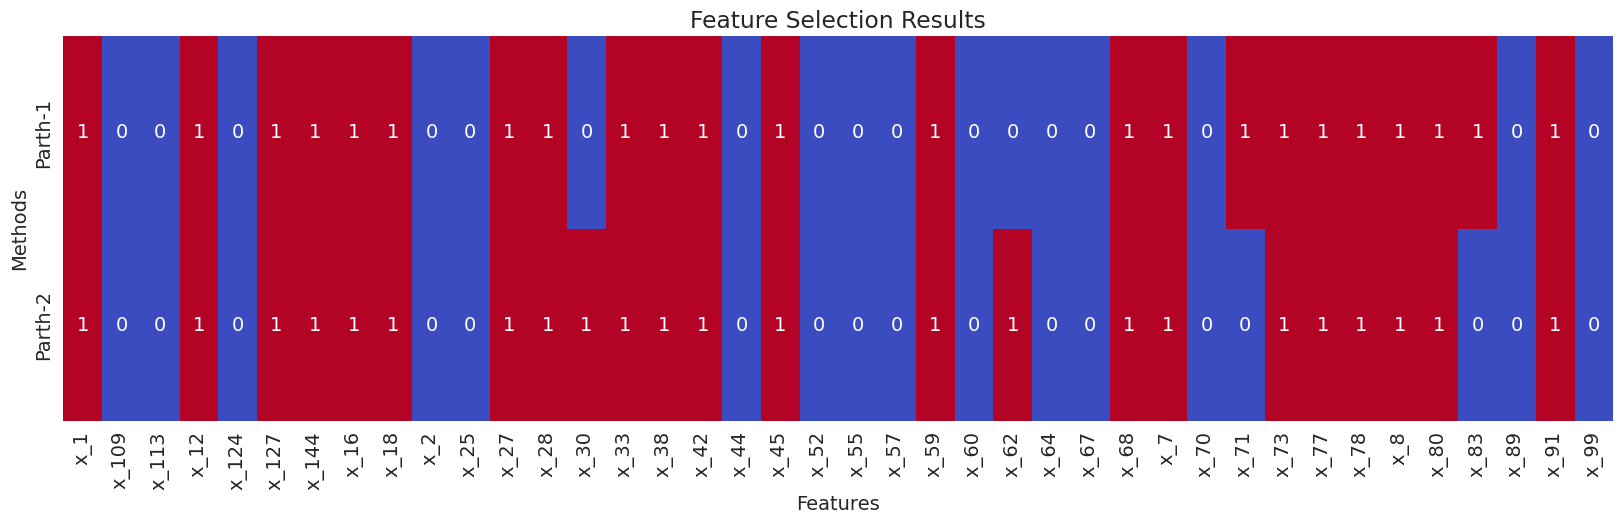

In [307]:
plt.figure(figsize=(20,5))
sns.heatmap(transposed_voting_df_parth, cmap="coolwarm", annot=True, fmt="d", cbar=False, xticklabels=True, yticklabels=True)
plt.title("Feature Selection Results")
plt.xlabel("Features")
plt.ylabel("Methods")
plt.show()